In [66]:
import pylab
from mpl_toolkits.mplot3d import Axes3D
from numpy import exp,arange
import numpy as np
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
%matplotlib inline
e = 2.718281
eps = 0.0001
n = 10
m = 50
h = 1/n
tau = 1/m
k = tau/h
print(k)

def makeData (h, tau):
    x = np.arange (0, 1, h)
    t = np.arange (0, 1, tau)
    xgrid, tgrid = np.meshgrid(x, t)
    zgrid = xgrid **2 / 2 + xgrid * np.exp(-tgrid)-tgrid 
    return xgrid, tgrid, zgrid

0.19999999999999998


Аналитическое решение

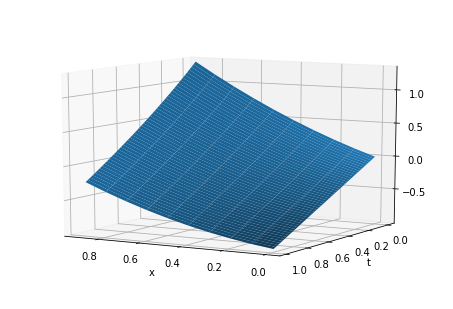

In [72]:
x, y, z = makeData(h, tau)
fig = pylab.figure()
axes = Axes3D(fig)
axes.plot_surface(x, y, z)
plt.xlabel('x')
plt.ylabel('t')
axes.view_init(10, 120)
pylab.show()

In [69]:
a = [[0] * m for i in range(n)]
xr=np.linspace(0, 1, m)
tr=np.linspace(0, 1, n)
for j in range(len(a[0])):
    a[0][j]=xr[j]+((xr[j])**2)/2
for i in range(1,len(a)):
    a[i][0]=-tr[i]
for i in range(len(a)-1):
    for j in range(1,len(a[i])):
        a[i+1][j]=a[i][j]-k*(xr[j]+np.exp(tr[i]))*(a[i][j]-a[i][j-1])+tau*xr[j]*(xr[j]+np.exp(tr[i]))
a=np.array(a)
print(a[n-1])

[-1.         -0.74364556 -0.45984017 -0.21184938 -0.04679057  0.04113717
  0.08682518  0.1181409   0.14674527  0.1754774   0.20471942  0.23449345
  0.26479948  0.29563752  0.32700758  0.35890963  0.3913437   0.42430977
  0.45780786  0.49183795  0.52640004  0.56149415  0.59712026  0.63327838
  0.66996851  0.70719065  0.74494479  0.78323094  0.8220491   0.86139927
  0.90128144  0.94169562  0.98264181  1.02412001  1.06613022  1.10867243
  1.15174665  1.19535288  1.23949111  1.28416136  1.32936361  1.37509787
  1.42136414  1.46816241  1.5154927   1.56335499  1.61174928  1.66067559
  1.7101339   1.76012422]


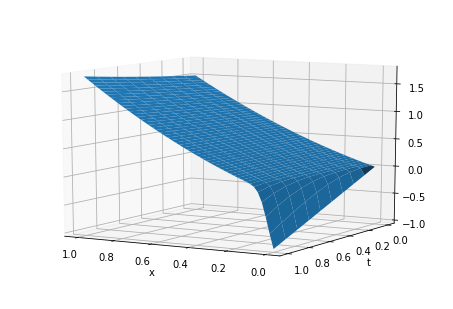

In [71]:
xgrid, tgrid = np.meshgrid(xr, tr)
ugrid = a
fig = pylab.figure()
axes = Axes3D(fig)
plt.xlabel('x')
plt.ylabel('t')
axes.plot_surface(xgrid, tgrid, ugrid)
axes.view_init(10, 120)
pylab.show()

In [57]:
rx = np.linspace(0 , 1 ,n + 1)
rt = np.linspace(0 , 1 ,m + 1)
#u = np.zeros((n, m))
#for i in range(n):
#    u[i][0] = rx[i]+0.5*rx[i]**2
#for j in range(m):
#    u[0][j] = -rt[j]
#for i in range(m-1):
#    for j in range(n-1):
#        u[j+1][i] = u[j][i] - rt[j]/h*(rx[i]+exp(rt[j]))*(u[j][i]-u[j][i-1])+rt[j]*rx[i]*(rx[i]+exp(rt[j]))
u = np.array(u)
print(rx)
##rxgrid, rtgrid = np.meshgrid(rx, rt)

[0.         0.03333333 0.06666667 0.1        0.13333333 0.16666667
 0.2        0.23333333 0.26666667 0.3        0.33333333 0.36666667
 0.4        0.43333333 0.46666667 0.5        0.53333333 0.56666667
 0.6        0.63333333 0.66666667 0.7        0.73333333 0.76666667
 0.8        0.83333333 0.86666667 0.9        0.93333333 0.96666667
 1.        ]


ValueError: shape mismatch: objects cannot be broadcast to a single shape

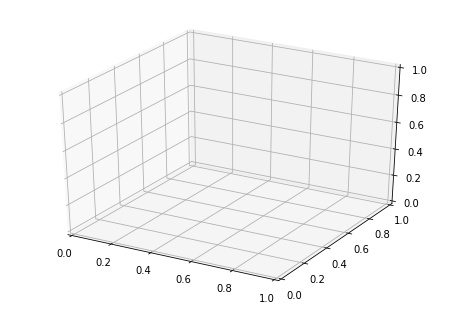

In [51]:
def makeDataCount (h, tau, u):
    x = np.arange (0, 1, h)
    t = np.arange (0, 1, tau)
    xgrid, tgrid = np.meshgrid(x, t) 
    return xgrid, tgrid, u
x, y, z = makeDataCount(h, tau, u)
fig = pylab.figure()
axes = Axes3D(fig)
axes.plot_surface(x, y, z)
axes.view_init(10, 120)
pylab.show()